# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import time; time.time() 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
#    if city not in cities:
    cities.append(city)

In [4]:
#I used this code to drop duplicate cities
cities = list( dict.fromkeys(cities) )
# Print the city count to confirm sufficient count

len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
lat=[]
lng=[]
country=[]
humid=[]
cloudy=[]
wind=[]
maxtemp=[]
ID=[]
date=[]
city = []



url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

query_url = f'{url}&appid={weather_api_key}&units={units}&q='
print(query_url)



http://api.openweathermap.org/data/2.5/weather?&appid=df69fd70713fc21d55d2bc3c3a8305cb&units=metric&q=


In [6]:
 for City in cities:
    try:
        response = requests.get(query_url + City).json()
    except Exception as e:
        print(e)
        
    if(response['cod']=="400"):
        print(f'Error with: {City}')
    else:
        try:
            lat.append(response['coord']['lat'])
        except:
            print('Error')
        try:
            lng.append(response['coord']['lon'])
        except:
            print('Error')
        try:
            maxtemp.append(response['main']['temp_max'])
        except:
            print('Error')
        try:
            humid.append(response['main']['humidity'])
        except:
            print('Error')
        try:
            ID.append(response['id'])
        except:
            print('Error')
        try:
            city.append(response['name'])
        except:
            print('Error')
        try:
            country.append(response['sys']['country'])
        except:
            print('Error')
        try:
            cloudy.append(response['clouds']['all'])
        except:
            print('Error')
        try:
            wind.append(response['wind']['speed'])
        except:
            print('Error')
        try:
            date.append(response['dt'])
        except:
            print('Error')
        try:
            print(response['city'] + " " + 'has the city id of' + ' ' + str(response['id']) + '.')
        except:
            print('Error')
                            
           
                                         


        

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Erro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
len(city)

553

In [8]:
weather_dict = {
    "City": city,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp":maxtemp,
    "Humidity":humid,
    "Wind Speed":wind,
    "Country":country,
    'Cloudiness':cloudy,
    "Date":date}

weather_df = pd.DataFrame(weather_dict)

weather_df = weather_df.dropna(how='any')

weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Country,Cloudiness,Date
0,Arraial do Cabo,-22.97,-42.03,20.00,94,5.10,BR,75,1590348321
1,Necochea,-38.55,-58.74,14.44,79,3.13,AR,100,1590348141
2,Kapaa,22.08,-159.32,27.78,74,2.10,US,1,1590348048
3,Atherton,53.52,-2.49,16.67,60,2.24,GB,9,1590348321
4,Hilo,19.73,-155.09,26.00,65,2.10,US,90,1590348097
...,...,...,...,...,...,...,...,...,...
548,Granada,37.19,-3.61,27.00,32,3.60,ES,84,1590348271
549,Codrington,-38.27,141.97,8.42,88,2.70,AU,65,1590348355
550,Kaeo,-35.10,173.78,17.78,3,2.68,NZ,100,1590348355
551,Mercedes,-34.65,-59.43,17.78,47,1.34,AR,100,1590348355


In [9]:
#convert maxtemp from celsius to farenheit and wind from m/s to mph
def celsius_to_fahr(temp_cel):
    temp_fahr = (temp_cel * 9/5) + 32
    return temp_fahr

celsius_to_fahr(weather_df['Max Temp'])

weather_df["Max Temp F"] = celsius_to_fahr(weather_df['Max Temp'])

def windconvert(mpersec):
    mph = mpersec * 2.2369
    return mph

windconvert(weather_df['Wind Speed'])
weather_df['Wind Speed mph'] = windconvert(weather_df['Wind Speed'])

weather_df["Max Temp F"] = weather_df["Max Temp F"].map("{:.2f}".format)
weather_df["Wind Speed mph"] = weather_df["Wind Speed mph"].map("{:.2f}".format)

weather_df





,City,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Country,Cloudiness,Date,Max Temp F,Wind Speed mph
0,Arraial do Cabo,-22.97,-42.03,20.00,94,5.10,BR,75,1590348321,68.00,11.41
1,Necochea,-38.55,-58.74,14.44,79,3.13,AR,100,1590348141,57.99,7.00
2,Kapaa,22.08,-159.32,27.78,74,2.10,US,1,1590348048,82.00,4.70
3,Atherton,53.52,-2.49,16.67,60,2.24,GB,9,1590348321,62.01,5.01
4,Hilo,19.73,-155.09,26.00,65,2.10,US,90,1590348097,78.80,4.70
...,...,...,...,...,...,...,...,...,...,...,...
548,Granada,37.19,-3.61,27.00,32,3.60,ES,84,1590348271,80.60,8.05
549,Codrington,-38.27,141.97,8.42,88,2.70,AU,65,1590348355,47.16,6.04
550,Kaeo,-35.10,173.78,17.78,3,2.68,NZ,100,1590348355,64.00,5.99
551,Mercedes,-34.65,-59.43,17.78,47,1.34,AR,100,1590348355,64.00,3.00


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
fullhumidity = weather_df.loc[weather_df['Humidity']>100]
fullhumidity

#It appears that no cities in my dataframe have humidity >100.


,City,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Country,Cloudiness,Date,Max Temp F,Wind Speed mph


In [11]:
# Extract relevant fields from the data frame
cols = ['City', 'Latitude', 'Longitude', 'Max Temp', 'Humidity', 'Wind Speed', 'Country', 'Cloudiness', 'Date']
city_data=weather_df[cols].replace({'0':np.nan, 0:np.nan})
city_data=weather_df.dropna(how='any')



city_data.to_csv("citydata.xlsx", encoding='utf-8')
# Export the City_Data into a csv
#weather_df.to_excel("weatherdata.xlsx", encoding='utf-8')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

## Latitude vs. Humidity Plot

# analysis of plots
Of all of the plots, the only one that shows a relationship to latitute is temperature. The U-shaped pattern of the dots show that temperatures appear to increase the close to 0 latitude. This confirms the assumption that the closer to the equator, the hotter the temperature. Notice, however, that the max temperature does vary at each latitude. Those difference are caused by various factors, including elevation, proximity to large bodies of water, and time of day. The plots for humidity, cloudiness, and wind speed demostrate that those weather conditions are aligned with those factors more than latitude.  

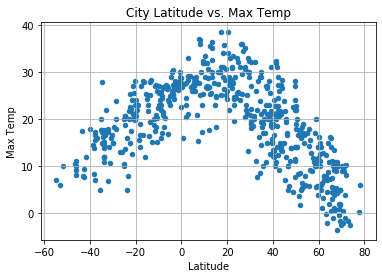

In [59]:
weatherplot1_df=city_data[["Latitude", "Max Temp", 'Humidity', "Wind Speed", 'Cloudiness', 'Max Temp F']]

LatTemp=weather_df.reset_index()


LatTemp.plot(kind='scatter', x='Latitude', y='Max Temp', grid=True, title = "City Latitude vs. Max Temp")
             
       
file_name = str(time.strftime("%m-%d-%y") + "Max Temp")
             
plt.savefig(file_name)

plt.show()

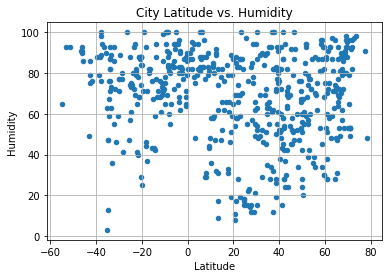

In [52]:
LatHumid=city_data.reset_index()

LatHumid.plot(kind='scatter', x='Latitude', y='Humidity', grid=True, title = "City Latitude vs. Humidity")

file_name = str(time.strftime("%m-%d-%y") + "Humidity")
plt.savefig(file_name)

plt.show()

## Latitude vs. Cloudiness Plot

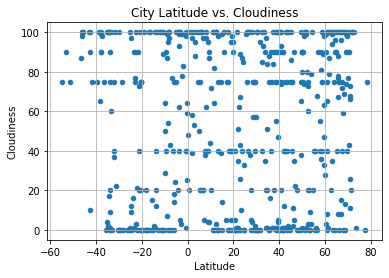

In [53]:
LatCloud=city_data.reset_index()

LatCloud.plot(kind='scatter', x='Latitude', y='Cloudiness', grid=True, title = "City Latitude vs. Cloudiness")

file_name = str(time.strftime("%m-%d-%y") + "Cloudiness")
plt.savefig(file_name)

plt.show()

## Latitude vs. Wind Speed Plot

In [15]:
latwindmph=(city_data['Wind Speed']) * 2.2369
latwindmph

0      11.408190
1       7.001497
2       4.697490
3       5.010656
4       4.697490
         ...    
548     8.052840
549     6.039630
550     5.994892
551     2.997446
552     8.746279
Name: Wind Speed, Length: 553, dtype: float64

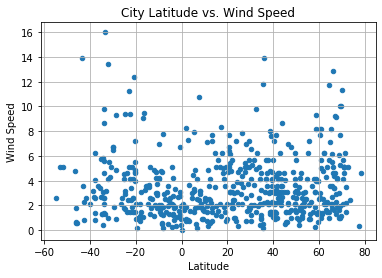

In [54]:
LatWind=city_data.reset_index()

LatWind.plot(kind='scatter', x='Latitude', y='Wind Speed', grid=True, title = "City Latitude vs. Wind Speed")

file_name = str(time.strftime("%m-%d-%y") + "Wind Speed")
plt.savefig(file_name)

plt.show()

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots



In [18]:
# Create Northern and Southern Hemisphere DataFrames
northernlat=city_data.loc[weather_df['Latitude']>0]
southernlat=city_data.loc[weather_df['Latitude']<0]

#northernlat['Max Temp F']=northernlat.column.astype('int64')

northernlat



,City,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Country,Cloudiness,Date,Max Temp F,Wind Speed mph
2,Kapaa,22.08,-159.32,27.78,74,2.10,US,1,1590348048,82.00,4.70
3,Atherton,53.52,-2.49,16.67,60,2.24,GB,9,1590348321,62.01,5.01
4,Hilo,19.73,-155.09,26.00,65,2.10,US,90,1590348097,78.80,4.70
5,The Valley,18.22,-63.06,31.00,66,4.60,AI,40,1590348321,87.80,10.29
6,Krasnosel'kup,65.70,82.47,7.58,66,5.52,RU,8,1590348321,45.64,12.35
...,...,...,...,...,...,...,...,...,...,...,...
544,Dryden,49.78,-92.75,22.00,56,3.10,CA,90,1590348355,71.60,6.93
545,Kilsyth,55.98,-4.06,15.56,69,0.89,GB,1,1590348355,60.01,1.99
547,Māngrol,21.12,70.12,28.02,85,6.15,IN,0,1590348355,82.44,13.76
548,Granada,37.19,-3.61,27.00,32,3.60,ES,84,1590348271,80.60,8.05


In [41]:
####I attempted to write a function but was unable to run it. I was this close to getting it right.

###def make_scatters(dataframe, columnhed):
###    x_values = (dataframe)['Latitude']
###    y_values = (dataframe)['(columnhed)']
###    correlation = st.pearsonr(x_values, y_values)


###    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
###    regress_values = x_values * slope + intercept
###    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

###    plt.scatter(x_values,y_values)
###    plt.plot(x_values,regress_values,"r-")
###    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
###    plt.title('(columnhed) vs. Latitude')
###    plt.xlabel('Latitude')
###    plt.ylabel('(columnhed)')

###    print(f"The correlation between both factors is {round(correlation[0],2)}")

###    plt.show()



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
ftempnorth = northernlat['Max Temp']*9/5+32

len(ftempnorth)

382

The correlation between both factors is -0.8


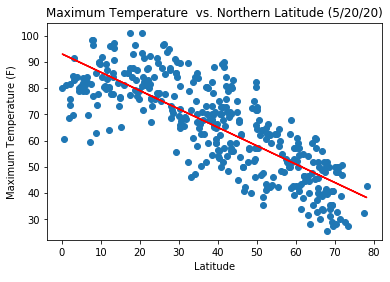

In [21]:
x_values = northernlat['Latitude']
y_values = ftempnorth
correlation = st.pearsonr(x_values, y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Maximum Temperature  vs. Northern Latitude')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')

print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [22]:
ftempsouth = southernlat['Max Temp']*9/5+32

len(ftempsouth)

171

The correlation between both factors is 0.76


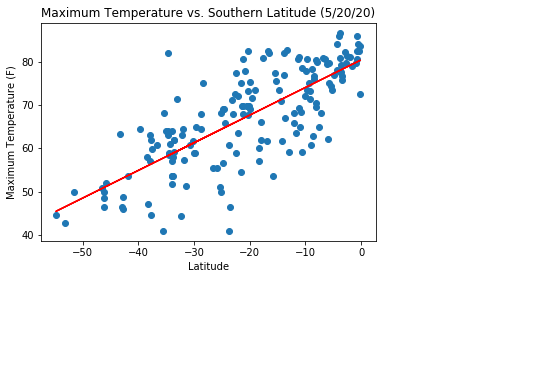

In [23]:
x_values = southernlat['Latitude']
y_values = ftempsouth
correlation = st.pearsonr(x_values, y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Maximum Temperature vs. Southern Latitude')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')

print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.07


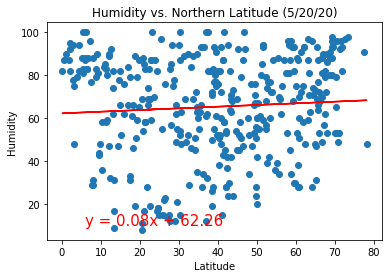

In [24]:
x_values = northernlat['Latitude']
y_values = northernlat['Humidity']
correlation = st.pearsonr(x_values, y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Humidity vs. Northern Latitude (5/20/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.06


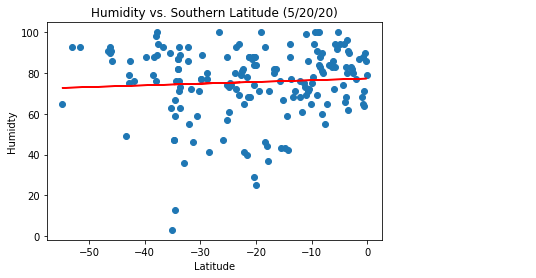

In [25]:
x_values = southernlat['Latitude']
y_values = southernlat['Humidity']
correlation = st.pearsonr(x_values, y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Humidity vs. Southern Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidty')

print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.08


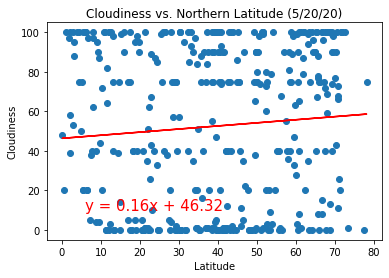

In [26]:
x_values = northernlat['Latitude']
y_values = northernlat['Cloudiness']
correlation = st.pearsonr(x_values, y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Cloudiness vs. Northern Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is -0.08


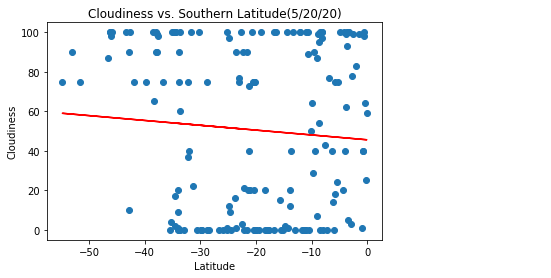

In [27]:
x_values = southernlat['Latitude']
y_values = southernlat['Cloudiness']
correlation = st.pearsonr(x_values, y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Cloudiness vs. Southern Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [28]:
windnorth=(northernlat['Wind Speed']) * 2.2369
windnorth

2       4.697490
3       5.010656
4       4.697490
5      10.289740
6      12.347688
         ...    
544     6.934390
545     1.990841
547    13.756935
548     8.052840
552     8.746279
Name: Wind Speed, Length: 382, dtype: float64

The correlation between both factors is 0.12


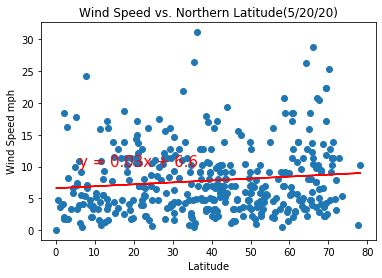

In [29]:
x_values = northernlat['Latitude']
y_values = windnorth
correlation = st.pearsonr(x_values, y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Wind Speed vs. Northern Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')

print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [30]:
windsouth=(southernlat['Wind Speed']) * 2.2369
windsouth

0      11.408190
1       7.001497
8      10.625275
12     11.408190
13     14.987230
         ...    
543    12.302950
546     4.115896
549     6.039630
550     5.994892
551     2.997446
Name: Wind Speed, Length: 171, dtype: float64

The correlation between both factors is -0.21


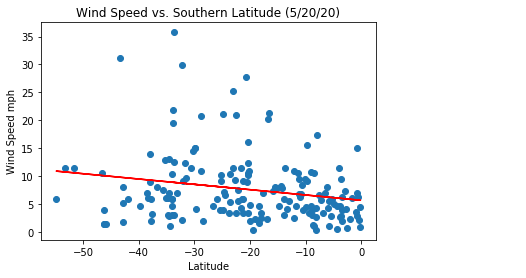

In [31]:
x_values = southernlat['Latitude']
y_values = windsouth
correlation = st.pearsonr(x_values, y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Wind Speed vs. Southern Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')

print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()